In [1]:
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# import Data
file = Path("myopia (1).csv")
myopia = pd.read_csv(file)
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = myopia['MYOPIC']
myopia.drop('MYOPIC', axis=1).head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
myo_scaled = scaler.fit_transform(myopia)

In [5]:
# Dimensionality Reduction
# 0.90 to preserve ~90% of explained variance
pca = PCA(n_components=0.90)
myo_pca = pca.fit_transform(myo_scaled)

# PCA to dataframe
df_myo_pca = pd.DataFrame(myo_pca)

# print sum of explained variance ratio
pca.explained_variance_ratio_.sum()

0.9289880687733467

In [6]:
# Run t-SNE model 
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_myo_pca)

c:\Users\Angiescomputer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [7]:
# shape of t-SNE model
tsne_features.shape

(618, 2)

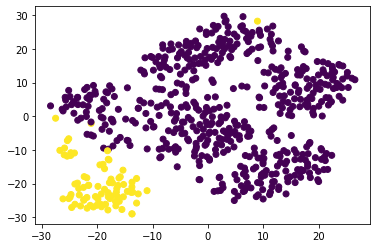

In [8]:
# Plot t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=labels)
plt.show()

c:\Users\Angiescomputer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


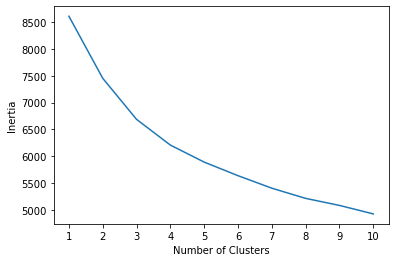

In [9]:
# Perform a Cluster Analysis with K-means
inertia = []
k = list(range(1,11))

# for-loop for elbow plot
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myo_pca)
    inertia.append(km.inertia_)
elbow = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow)

# plot elbow data
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(k)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# n_clusters from k=4 above
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_myo_pca)
pred = model.predict(df_myo_pca)
df_myo_pca['predicted class'] = model.labels_
df_myo_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,predicted class
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,3
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,0
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,1
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,3
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,0


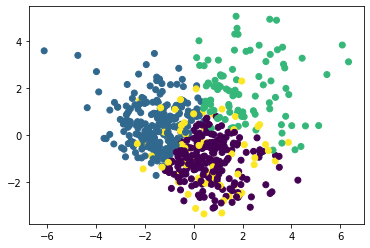

In [11]:
# plot with n=4 clusters
plt.scatter(df_myo_pca[0], df_myo_pca[1], c=df_myo_pca['predicted class'])
plt.show()

c:\Users\Angiescomputer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Angiescomputer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


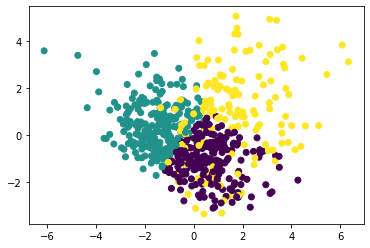

In [12]:
# plot looks to be clustered better with k=3, the elbow could be said to be at 3 as well
model = KMeans(n_clusters=3, random_state=0)
model.fit(df_myo_pca)
pred = model.predict(df_myo_pca)
df_myo_pca['predicted class'] = model.labels_
plt.scatter(df_myo_pca[0], df_myo_pca[1], c=df_myo_pca['predicted class'])
plt.show()